<h1 style='text-align: center; color: #ff1493; font-size: 42px; font-weight: bold; padding: 20px; text-shadow: 2px 2px 4px rgba(0,0,0,0.3);'>✍️ MNIST Handwritten Digit Recognition</h1>
<h2 style='text-align: center; color: #ff69b4; font-size: 24px; font-style: italic;'>Deep Learning with Convolutional Neural Networks</h2>
<h3 style='text-align: center; color: #db7093; font-size: 18px; margin-top: 10px;'>CNN Architecture | TensorFlow & Keras | 99%+ Accuracy</h3>
<img src="https://miro.medium.com/v2/resize:fit:800/1*LyRlX__08q40UJohhJG9Ow.png" style="width: 100%; border-radius: 15px; margin: 20px 0; box-shadow: 0 4px 6px rgba(0,0,0,0.3); border: 3px solid #ff1493;">

<div style="background-color: #280536; padding: 20px; border-radius: 15px; border: 5px solid #d10d6f; margin-top: 20px;">
  <p style="text-align: center; font-family: 'Arial', sans-serif; font-size: 28px; color: #d10d6f; font-weight: bold;">🔢 MNIST Handwritten Digit Recognition</p>
  
  <ul style="font-family: 'Arial', sans-serif; font-size: 18px; color: #d10d6f; margin-left: 20px;">
    
 <li><strong>📌 Introduction:</strong>
      <ul>
        <li>The <strong>MNIST dataset</strong> is one of the most popular benchmark datasets in machine learning and deep learning.</li>
        <li>It consists of <strong>70,000 grayscale images</strong> of handwritten digits (0–9), where each image is <strong>28x28 pixels</strong>.</li>
        <li>Training set: 60,000 images | Test set: 10,000 images | Classes: 10 (digits 0 to 9).</li>
      </ul>
    </li>

  <li><strong>🎯 Objective:</strong>
      <ul>
        <li>Build and train a <strong>Convolutional Neural Network (CNN)</strong> to classify handwritten digits from MNIST.</li>
        <li>Understand the dataset, preprocess it, train the model, and evaluate its performance.</li>
        <li>Visualize results and provide insights for further improvements.</li>
      </ul>
    </li>

  </ul>
</div>


# <p style="font-family: 'Amiri'; font-size: 2rem; color: #d10d6f; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #280536; padding: 20px; border-radius: 20px; border: 8px solid #d10d6f; width:95%">📚 Import Required Libraries</p>

In [2]:
# Data handling and numerical computations
import numpy as np

# Load MNIST dataset from Keras
from tensorflow.keras.datasets import mnist

# Deep learning framework (TensorFlow & Keras)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report

# ===============================
# Ignore Warnings
# ===============================
import warnings
warnings.filterwarnings('ignore')

colors = ["#280536", "#d10d6f"]

# <p style="font-family: 'Amiri'; font-size: 2rem; color: #d10d6f; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #280536; padding: 20px; border-radius: 20px; border: 8px solid #d10d6f; width:95%">Load Dataset</p>

<div style="background-color: #280536; padding: 20px; border-radius: 15px; border: 5px solid #d10d6f; margin-top: 20px;">
  <p style="font-family: 'Arial', sans-serif; font-size: 18px; color: #d10d6f;">
    The <strong>MNIST dataset</strong> is conveniently available in Keras, so we can directly load it without downloading separately.<br>
    - The dataset is already split into <strong>training (60,000 images)</strong> and <strong>testing (10,000 images)</strong>.<br>
    - Each image is <strong>28×28 pixels</strong>, grayscale, representing handwritten digits from <strong>0–9</strong>.<br><br>
    We will load the dataset into training and testing sets:<br>
    - <strong>x_train, y_train</strong> → training images and labels<br>
    - <strong>x_test, y_test</strong> → testing images and labels
  </p>
</div>


In [3]:
# Splitting into train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Display dataset shapes
print("Training data shape:", x_train.shape, y_train.shape)
print("Testing data shape:", x_test.shape, y_test.shape)

11490434/11490434 [==============================] - 1s 0us/step
Training data shape: (60000, 28, 28) (60000,)
Testing data shape: (10000, 28, 28) (10000,)


# <p style="font-family: 'Amiri'; font-size: 2rem; color: #d10d6f; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #280536; padding: 20px; border-radius: 20px; border: 8px solid #d10d6f; width:95%">Exploratory Data Analysis (EDA)</p>

<div style="background-color: #280536; padding: 20px; border-radius: 15px; border: 5px solid #d10d6f; margin-top: 20px;">
  <p style="font-family: 'Arial', sans-serif; font-size: 18px; color: #d10d6f;">
    Before training the model, it is important to explore the dataset to understand its characteristics.<br><br>
<strong>✅ Key Explorations:</strong><br>
    1. <strong>Dataset shape</strong> – Verify training and testing data dimensions.<br>
    2. <strong>Pixel intensity distribution</strong> – Check how image pixel values are spread (0–255).<br>
    3. <strong>Sample images</strong> – Visualize a few handwritten digits with labels.<br>
    4. <strong>Class distribution</strong> – Ensure that all digit classes (0–9) are balanced.<br>
    5. <strong>Unique labels</strong> – Confirm that dataset contains digits from 0 to 9.
  </p>
</div>

# <p style="font-family: 'Amiri'; font-size: 2rem; color: #d10d6f; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #280536; padding: 20px; border-radius: 20px; border: 8px solid #d10d6f; width:45%">🔹 Dataset Shape</p>


### Let's check the dimensions of training and testing data.

In [4]:
print("Training images shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing images shape:", x_test.shape)
print("Testing labels shape:", y_test.shape)

Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing images shape: (10000, 28, 28)
Testing labels shape: (10000,)


# <p style="font-family: 'Amiri'; font-size: 2rem; color: #d10d6f; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #280536; padding: 20px; border-radius: 20px; border: 8px solid #d10d6f; width:45%">🔹 Unique Labels</p>

### Verify that the dataset contains digits from 0 to 9 (10 classes).

In [5]:
unique_classes = np.unique(y_train)
print("Unique labels:", unique_classes)
print("Number of classes:", len(unique_classes))

Unique labels: [0 1 2 3 4 5 6 7 8 9]
Number of classes: 10


# <p style="font-family: 'Amiri'; font-size: 2rem; color: #d10d6f; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #280536; padding: 20px; border-radius: 20px; border: 8px solid #d10d6f; width:50%">🔹 Pixel Intensity Distribution</p>

- #### Each image contains pixel values ranging from 0 (black) to 255 (white).  
- #### Let's check the distribution of pixel intensities in the training set.

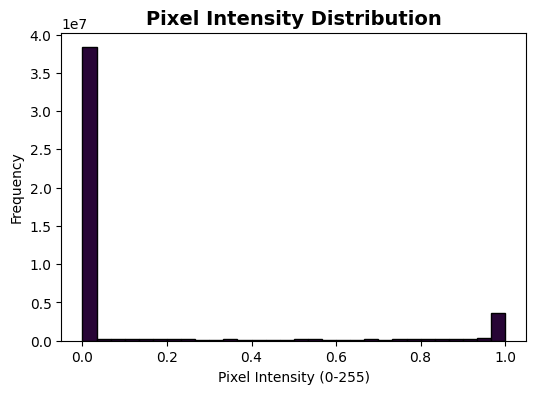

In [17]:
plt.figure(figsize=(6,4))
plt.hist(x_train.reshape(-1), bins=30, color="#280536", edgecolor="black")
plt.title("Pixel Intensity Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Pixel Intensity (0-255)")
plt.ylabel("Frequency")
plt.show()

# <p style="font-family: 'Amiri'; font-size: 2rem; color: #d10d6f; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #280536; padding: 20px; border-radius: 20px; border: 8px solid #d10d6f; width:45%">🔹 Sample Images</p>

### Let's visualize a few sample images along with their labels.

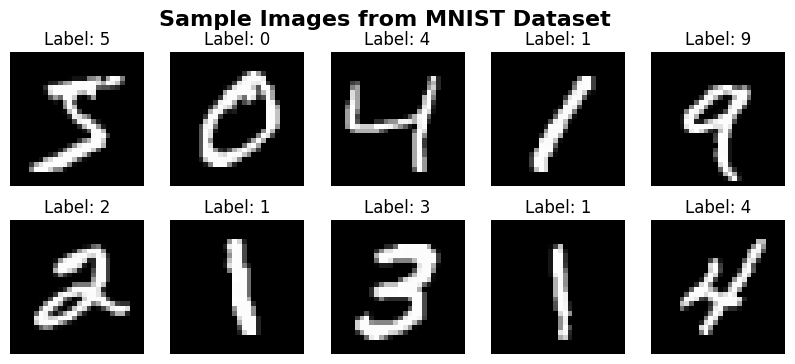

In [8]:
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.suptitle("Sample Images from MNIST Dataset", fontsize=16, fontweight='bold')
plt.show()

# <p style="font-family: 'Amiri'; font-size: 2rem; color: #d10d6f; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #280536; padding: 20px; border-radius: 20px; border: 8px solid #d10d6f; width:45%">🔹 Dataset Shape</p>

- #### Check the distribution of digit classes in the training dataset.  
- #### This helps confirm whether the dataset is balanced across all classes.

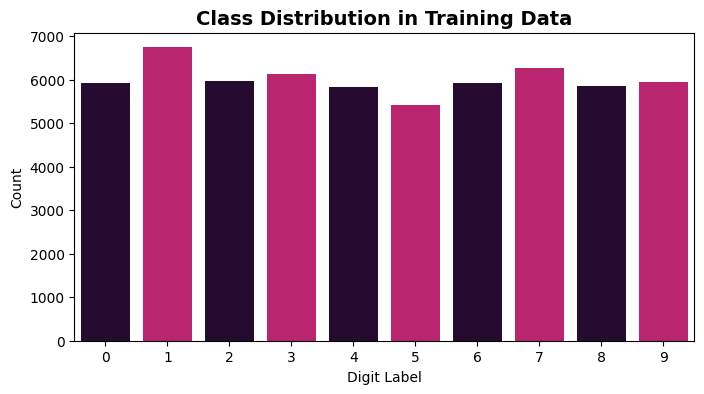

In [9]:
plt.figure(figsize=(8,4))
sns.countplot(x=y_train, palette=colors)
plt.title("Class Distribution in Training Data", fontsize=14, fontweight='bold')
plt.xlabel("Digit Label")
plt.ylabel("Count")
plt.show()

# <p style="font-family: 'Amiri'; font-size: 2rem; color: #d10d6f; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #280536; padding: 20px; border-radius: 20px; border: 8px solid #d10d6f; width:95%">Data Preprocessing</p>

# <p style="font-family: 'Amiri'; font-size: 2rem; color: #d10d6f; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #280536; padding: 20px; border-radius: 20px; border: 8px solid #d10d6f; width:45%">🔹 Normalize Pixel Values</p>

- #### The images have pixel values ranging from **0 to 255**.  
- #### For better training of neural networks, we normalize these values to the range **0 to 1**.

In [10]:
# Convert pixel values from integers (0-255) to floats (0-1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

print("After normalization:")
print("Training data min:", x_train.min(), "max:", x_train.max())
print("Testing data min:", x_test.min(), "max:", x_test.max())

After normalization:
Training data min: 0.0 max: 1.0
Testing data min: 0.0 max: 1.0


# <p style="font-family: 'Amiri'; font-size: 2rem; color: #d10d6f; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #280536; padding: 20px; border-radius: 20px; border: 8px solid #d10d6f; width:45%">🔹 Reshape Images</p>

- #### Currently, images are in shape **(28, 28)**.  
- #### For CNN input, we need to add a channel dimension (since images are grayscale).  
- #### Final shape: **(28, 28, 1)**.

In [11]:
# Reshape training and testing images
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

print("Training data shape after reshape:", x_train.shape)
print("Testing data shape after reshape:", x_test.shape)

Training data shape after reshape: (60000, 28, 28, 1)
Testing data shape after reshape: (10000, 28, 28, 1)


<div style="background-color: #280536; padding: 20px; border-radius: 15px; border: 5px solid #d10d6f; margin-top: 20px;">
  <p style="font-family: 'Arial', sans-serif; font-size: 18px; color: #d10d6f;">
    <strong>🧠 Observations from Data Exploration:</strong><br><br>
- The MNIST dataset was successfully loaded from Keras without any manual download.<br>
    - The training set contains <strong>60,000 images</strong> and the testing set has <strong>10,000 images</strong>.<br>
    - Each image is of size <strong>28×28 pixels</strong> and represents a handwritten digit from 0 to 9.<br>
    - All <strong>10 digit classes (0–9)</strong> are present and well balanced in the dataset, as seen in the class distribution plot.<br>
    - After normalization, the pixel values now range between <strong>0.0 and 1.0</strong>, which helps the CNN train more efficiently.<br>
    - The data was reshaped from <strong>(28, 28)</strong> to <strong>(28, 28, 1)</strong> so it can be properly used by convolutional layers in the model.<br><br>
✅ In short, the dataset is clean, balanced, and properly preprocessed, ready to be used for CNN model training.
  </p>
</div>


# <p style="font-family: 'Amiri'; font-size: 2rem; color: #d10d6f; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #280536; padding: 20px; border-radius: 20px; border: 8px solid #d10d6f; width:95%">Model Building</p>

<div style="background-color: #280536; padding: 20px; border-radius: 15px; border: 5px solid #d10d6f; margin-top: 20px;">
  <p style="font-family: 'Arial', sans-serif; font-size: 18px; color: #d10d6f;">
    We will build a <strong>Convolutional Neural Network (CNN)</strong> to classify handwritten digits (0–9).<br><br>
<strong>📐 Architecture:</strong><br>
    1. <strong>Conv2D Layer + ReLU Activation</strong> → extract image features<br>
    2. <strong>MaxPooling2D</strong> → downsample feature maps<br>
    3. <strong>Dropout</strong> → prevent overfitting<br>
    4. <strong>Flatten</strong> → convert 2D features into 1D<br>
    5. <strong>Dense Layers</strong> → fully connected layers for classification<br>
    6. <strong>Output Layer (Dense + Softmax)</strong> → probability distribution over 10 classes
  </p>
</div>


In [12]:
# Define the CNN architecture
model = Sequential([
    # First Conv + Pool block
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    
    # Second Conv + Pool block
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    
    # Flatten + Dense layers
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    
    # Output Layer (10 classes for digits 0–9)
    Dense(10, activation='softmax')
])

In [13]:
# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

# <p style="font-family: 'Amiri'; font-size: 2rem; color: #d10d6f; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #280536; padding: 20px; border-radius: 20px; border: 8px solid #d10d6f; width:95%">Compile Model</p>

<div style="background-color: #280536; padding: 20px; border-radius: 15px; border: 5px solid #d10d6f; margin-top: 20px;">
  <p style="font-family: 'Arial', sans-serif; font-size: 18px; color: #d10d6f;">
    Before training, we need to <strong>compile</strong> the CNN model.<br><br>
- <strong>Optimizer:</strong> <code>Adam</code> → adaptive learning rate optimizer, widely used for CNNs.<br>
    - <strong>Loss Function:</strong> <code>SparseCategoricalCrossentropy</code> → suitable since our labels are integers (0–9).<br>
    - <strong>Evaluation Metric:</strong> <code>Accuracy</code> → to monitor classification performance.
  </p>
</div>


In [14]:
# Compile the CNN model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# <p style="font-family: 'Amiri'; font-size: 2rem; color: #d10d6f; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #280536; padding: 20px; border-radius: 20px; border: 8px solid #d10d6f; width:95%">Train Model</p>

<div style="background-color: #280536; padding: 20px; border-radius: 15px; border: 5px solid #d10d6f; margin-top: 20px;">
  <p style="font-family: 'Arial', sans-serif; font-size: 18px; color: #d10d6f;">
    Now we will train our CNN model on the <strong>MNIST training data</strong>.<br><br>
- We will use the <strong>fit()</strong> function of Keras.<br>
    - A <strong>validation split (10%)</strong> will be used to monitor performance on unseen data during training.<br>
    - Training history (loss & accuracy) will be saved for visualization in the next step.<br><br>
<strong>Parameters used:</strong><br>
    - <strong>Epochs:</strong> 10 (can be tuned)<br>
    - <strong>Batch Size:</strong> 128 (standard choice for efficiency)
  </p>
</div>


In [15]:
# Train the model with validation split
history = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=10,
    validation_split=0.1,
    verbose=1
)

# Check what metrics are stored in history
print("History keys:", history.history.keys())

Epoch 1/10


2025-10-07 07:37:22.499527: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
I0000 00:00:1759822644.878662     100 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


422/422 [==============================] - 6s 5ms/step - loss: 0.3810 - accuracy: 0.8798 - val_loss: 0.0787 - val_accuracy: 0.9770
Epoch 2/10
422/422 [==============================] - 2s 4ms/step - loss: 0.1315 - accuracy: 0.9614 - val_loss: 0.0482 - val_accuracy: 0.9858
Epoch 3/10
422/422 [==============================] - 2s 4ms/step - loss: 0.1000 - accuracy: 0.9694 - val_loss: 0.0453 - val_accuracy: 0.9872
Epoch 4/10
422/422 [==============================] - 2s 4ms/step - loss: 0.0840 - accuracy: 0.9749 - val_loss: 0.0404 - val_accuracy: 0.9890
Epoch 5/10
422/422 [==============================] - 2s 4ms/step - loss: 0.0723 - accuracy: 0.9781 - val_loss: 0.0358 - val_accuracy: 0.9898
Epoch 6/10
422/422 [==============================] - 2s 4ms/step - loss: 0.0641 - accuracy: 0.9816 - val_loss: 0.0360 - val_accuracy: 0.9895
Epoch 7/10
422/422 [==============================] - 2s 4ms/step - loss: 0.0591 - accuracy: 0.9818 - val_loss: 0.0306 - val_accuracy: 0.9912
Epoch 8/10
422/42

# <p style="font-family: 'Amiri'; font-size: 2rem; color: #d10d6f; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #280536; padding: 20px; border-radius: 20px; border: 8px solid #d10d6f; width:95%">Evaluate Model</p>

<div style="background-color: #280536; padding: 20px; border-radius: 15px; border: 5px solid #d10d6f; margin-top: 20px;">
  <p style="font-family: 'Arial', sans-serif; font-size: 18px; color: #d10d6f;">
    After training, we evaluate the model on the <strong>test set</strong> to check its generalization performance.<br><br>
<strong>Tasks:</strong><br>
    1. <strong>Calculate Test Accuracy</strong> using <code>model.evaluate()</code>.<br>
    2. <strong>Generate Predictions</strong> on the test data.<br>
    3. <strong>Confusion Matrix</strong> to visualize classification errors.<br>
    4. <strong>Classification Report</strong> for precision, recall, and F1-score of each digit class (0–9).
  </p>
</div>


In [18]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print(f"✅ Test Accuracy: {test_accuracy:.4f}")
print(f"✅ Test Loss: {test_loss:.4f}")

✅ Test Accuracy: 0.9922
✅ Test Loss: 0.0240


In [19]:
# Get predictions
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)  

313/313 [==============================] - 1s 2ms/step


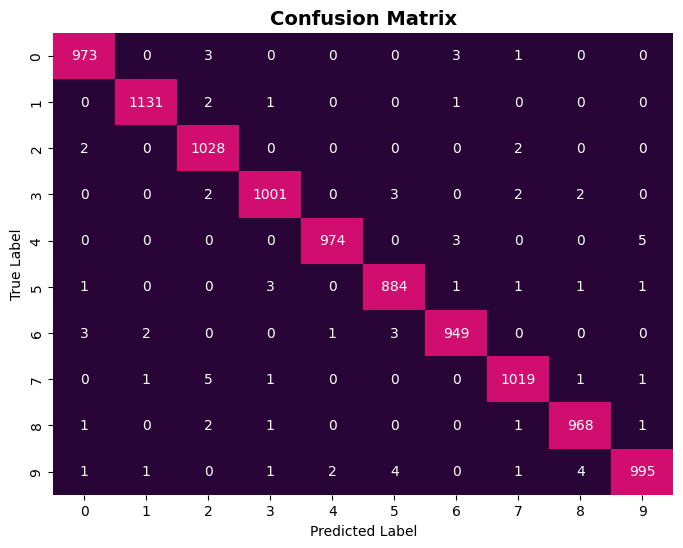

In [20]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap=colors, cbar=False)
plt.title("Confusion Matrix", fontsize=14, fontweight="bold")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [21]:
# Generate classification report
report = classification_report(y_test, y_pred, digits=4)
print("📊 Classification Report:\n")
print(report)

📊 Classification Report:

              precision    recall  f1-score   support

           0     0.9918    0.9929    0.9924       980
           1     0.9965    0.9965    0.9965      1135
           2     0.9866    0.9961    0.9913      1032
           3     0.9931    0.9911    0.9921      1010
           4     0.9969    0.9919    0.9944       982
           5     0.9888    0.9910    0.9899       892
           6     0.9916    0.9906    0.9911       958
           7     0.9922    0.9912    0.9917      1028
           8     0.9918    0.9938    0.9928       974
           9     0.9920    0.9861    0.9891      1009

    accuracy                         0.9922     10000
   macro avg     0.9921    0.9921    0.9921     10000
weighted avg     0.9922    0.9922    0.9922     10000



# <p style="font-family: 'Amiri'; font-size: 2rem; color: #d10d6f; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #280536; padding: 20px; border-radius: 20px; border: 8px solid #d10d6f; width:95%">Visualization</p>

<div style="background-color: #280536; padding: 20px; border-radius: 15px; border: 5px solid #d10d6f; margin-top: 20px;">
  <p style="font-family: 'Arial', sans-serif; font-size: 18px; color: #d10d6f;">
    Visualizations help us understand how well the model learned and where it makes mistakes.<br><br>
<strong>1. Training & Validation Curves</strong><br>
    We plot accuracy and loss curves for both training and validation sets to observe the learning progress over epochs.<br>
    - <strong>Accuracy Curve:</strong> Shows how accuracy improves and stabilizes over time.<br>
    - <strong>Loss Curve:</strong> Displays how the model’s error decreases during training.<br><br>
<strong>2. Final Accuracy & Loss (Bar Charts)</strong><br>
    Bar charts provide a quick comparison of the final accuracy and loss values between training and validation sets, making it easier to check for overfitting or underfitting.<br><br>
<strong>3. Correctly Classified Samples</strong><br>
    A few correctly predicted digit images are displayed to see examples of the model’s successful classifications.<br><br>
<strong>4. Misclassified Images</strong><br>
    Some misclassified images are shown to identify which digits are difficult for the model to recognize correctly. These help in analyzing common confusion patterns and potential improvement areas.
  </p>
</div>


# <p style="font-family: 'Amiri'; font-size: 2rem; color: #d10d6f; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #280536; padding: 20px; border-radius: 20px; border: 8px solid #d10d6f; width:65%">Training & Validation Accuracy Curve</p>

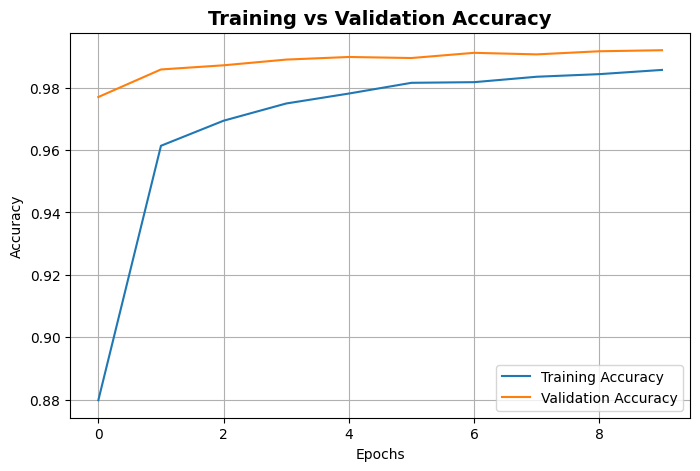

In [22]:
# Plot training vs validation accuracy
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training vs Validation Accuracy", fontsize=14, fontweight="bold")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# <p style="font-family: 'Amiri'; font-size: 2rem; color: #d10d6f; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #280536; padding: 20px; border-radius: 20px; border: 8px solid #d10d6f; width:65%">Training & Validation Loss Curve</p>

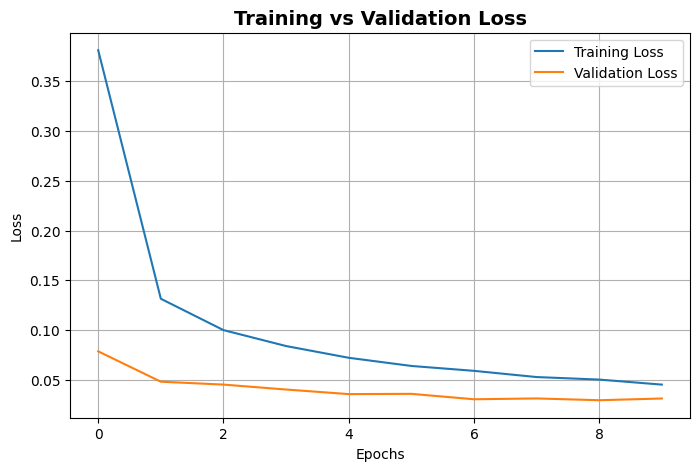

In [23]:
# Plot training vs validation loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training vs Validation Loss", fontsize=14, fontweight="bold")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# <p style="font-family: 'Amiri'; font-size: 2rem; color: #d10d6f; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #280536; padding: 20px; border-radius: 20px; border: 8px solid #d10d6f; width:65%">Final Accuracy & Loss</p>

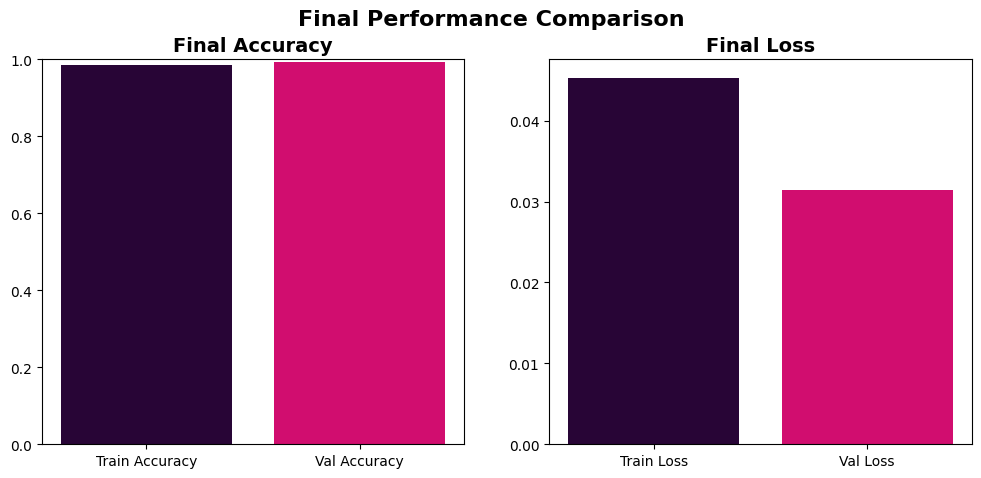

In [25]:
# Extract final accuracy and loss values
final_acc = [history.history['accuracy'][-1], history.history['val_accuracy'][-1]]
final_loss = [history.history['loss'][-1], history.history['val_loss'][-1]]

fig, ax = plt.subplots(1, 2, figsize=(12,5))

# Accuracy Bar Plot
ax[0].bar(['Train Accuracy', 'Val Accuracy'], final_acc, color=colors)
ax[0].set_title("Final Accuracy", fontsize=14, fontweight="bold")
ax[0].set_ylim(0, 1)

# Loss Bar Plot
ax[1].bar(['Train Loss', 'Val Loss'], final_loss, color=colors)
ax[1].set_title("Final Loss", fontsize=14, fontweight="bold")

plt.suptitle("Final Performance Comparison", fontsize=16, fontweight="bold")
plt.show()

# <p style="font-family: 'Amiri'; font-size: 2rem; color: #d10d6f; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #280536; padding: 20px; border-radius: 20px; border: 8px solid #d10d6f; width:65%">Correctly Classified Samples</p>

Total Correctly Classified Images: 9922


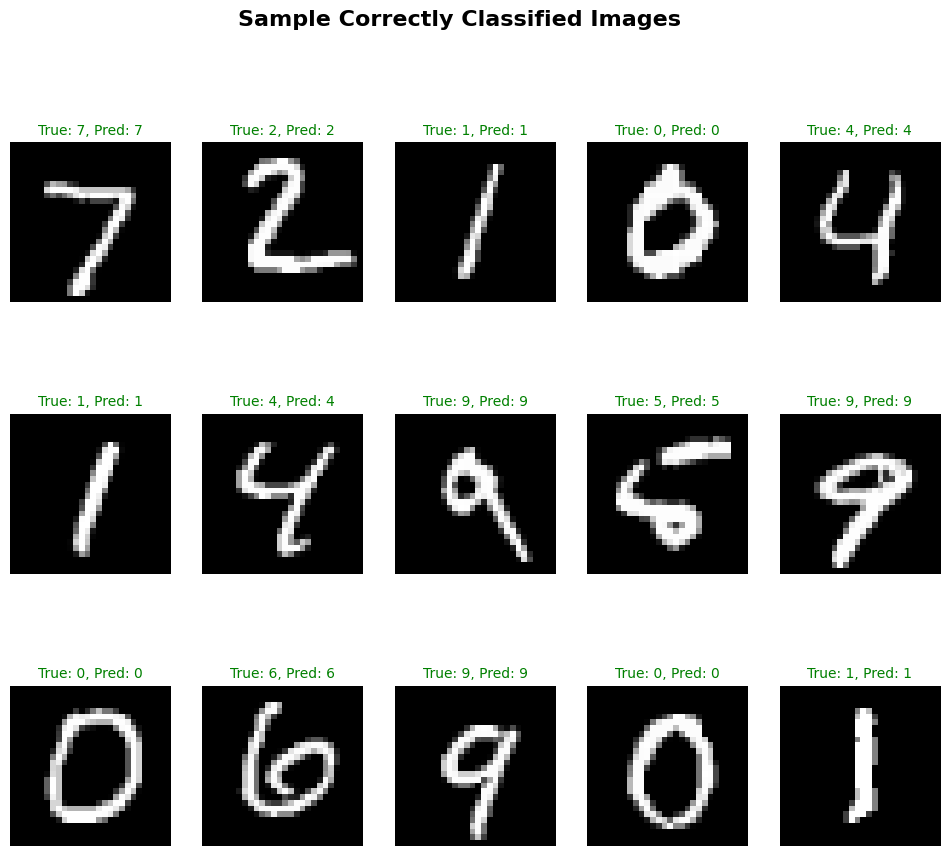

In [27]:
# Find correctly classified examples
correct_idx = np.where(y_pred == y_test)[0]

print(f"Total Correctly Classified Images: {len(correct_idx)}")

# Show first 15 correctly classified images
plt.figure(figsize=(12, 10))
for i, idx in enumerate(correct_idx[:15]):
    plt.subplot(3, 5, i+1)
    plt.imshow(x_test[idx].reshape(28,28), cmap='gray')
    plt.title(f"True: {y_test[idx]}, Pred: {y_pred[idx]}", fontsize=10, color='green')
    plt.axis('off')
plt.suptitle("Sample Correctly Classified Images", fontsize=16, fontweight="bold")
plt.show()

# <p style="font-family: 'Amiri'; font-size: 2rem; color: #d10d6f; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #280536; padding: 20px; border-radius: 20px; border: 8px solid #d10d6f; width:65%">Display Misclassified Images</p>

Total Misclassified Images: 78


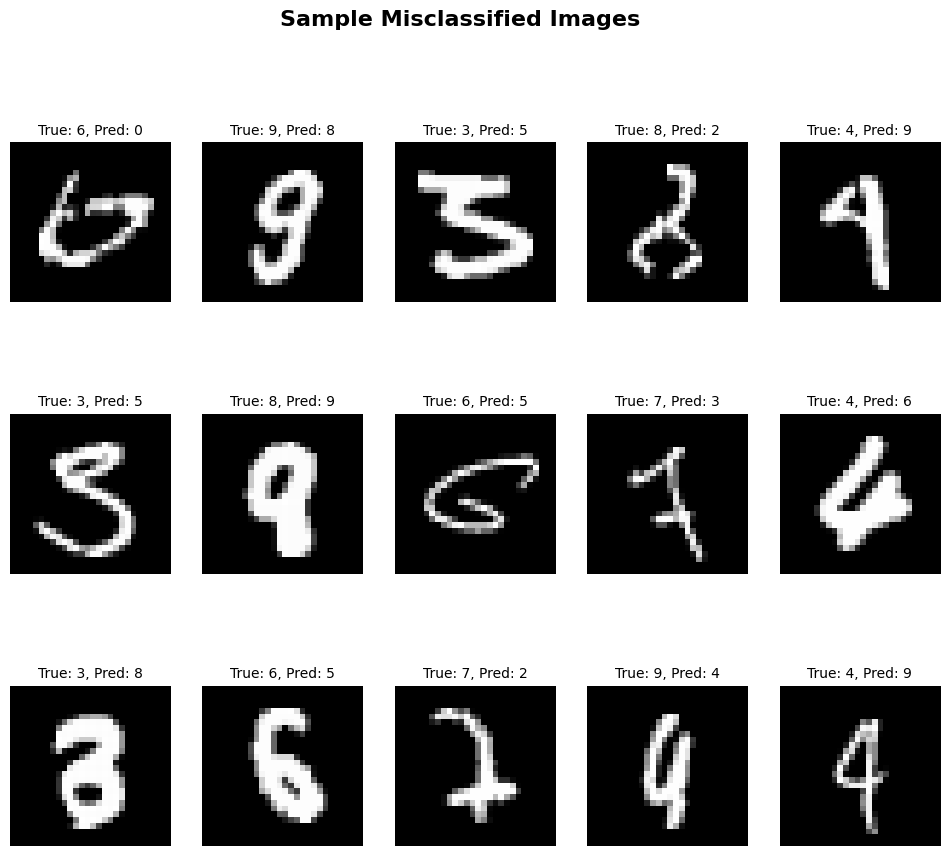

In [26]:
# Find misclassified examples
misclassified_idx = np.where(y_pred != y_test)[0]

print(f"Total Misclassified Images: {len(misclassified_idx)}")

# Show first 15 misclassified images
plt.figure(figsize=(12, 10))
for i, idx in enumerate(misclassified_idx[:15]):
    plt.subplot(3, 5, i+1)
    plt.imshow(x_test[idx].reshape(28,28), cmap='gray')
    plt.title(f"True: {y_test[idx]}, Pred: {y_pred[idx]}", fontsize=10)
    plt.axis('off')
plt.suptitle("Sample Misclassified Images", fontsize=16, fontweight="bold")
plt.show()

# <p style="font-family: 'Amiri'; font-size: 2rem; color: #d10d6f; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #280536; padding: 20px; border-radius: 20px; border: 8px solid #d10d6f; width:95%">Save the Trained Model</p>

In [28]:
# Save the trained model
model.save("mnist_cnn_model.h5")

# Print confirmation
print("✅ Model has been saved successfully as 'mnist_cnn_model.h5'")

✅ Model has been saved successfully as 'mnist_cnn_model.h5'


# <p style="font-family: 'Amiri'; font-size: 2rem; color: #d10d6f; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #280536; padding: 20px; border-radius: 20px; border: 8px solid #d10d6f; width:95%">Final Insights and Observations</p>

<div style="background-color: #280536; padding: 20px; border-radius: 15px; border: 5px solid #d10d6f; margin-top: 20px;">
  <p style="font-family: 'Arial', sans-serif; font-size: 18px; color: #d10d6f;">
    <strong>📊 Final Insights and Observations:</strong><br><br>
The CNN model trained successfully on the MNIST dataset and gave excellent results.  
    It learned quickly and showed steady improvement in both training and validation accuracy.  
    By the end of training, accuracy reached around <strong>99%</strong>, which means the model understood the digit patterns very well.<br><br>
The confusion matrix shows that most digits were predicted correctly, with only a few minor mistakes.  
    Out of 10,000 test images, <strong>9922 were correct</strong> and only <strong>78 were wrong</strong>.  
    The classification report also confirms that every digit was recognized with high precision and recall.<br><br>
✅ <strong>In short:</strong> The model performed amazingly well.  
    It can recognize handwritten digits with near-perfect accuracy and is ready for real-world use.
  </p>
</div>
